In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf

In [68]:
# Load the dataset
df = pd.read_csv("trend_data.csv")
# Check the first few rows
print(df.head())

     Month Grouping  DL  Consum
0  2024-01        A  10      20
1  2024-01        B  50      60
2  2024-01        C  30      50
3  2024-01        D  80      90
4  2024-01        E   5      15


In [69]:
# Summary statistics by Grouping
# group_summary = df.groupby("Grouping")[["DL", "Consum"]].describe()
# print(group_summary)

In [70]:
# Convert Month to datetime for better analysis
df["Month"] = pd.to_datetime(df["Month"])
df.head()

,Month,Grouping,DL,Consum
0,2024-01-01,A,10,20
1,2024-01-01,B,50,60
2,2024-01-01,C,30,50
3,2024-01-01,D,80,90
4,2024-01-01,E,5,15


In [ ]:
# Rate of Change (Month-over-Month Percentage Change)

df["DL_Change"] = df.groupby("Grouping")["DL"].pct_change() * 100
df["Consum_Change"] = df.groupby("Grouping")["Consum"].pct_change() * 100

# DL moving average
df["DL_MA"] = df.groupby("Grouping")["DL"].transform(lambda x: x.rolling(window=3).mean())

# Consum moving average
df["Consum_MA"] = df.groupby("Grouping")["Consum"].transform(lambda x: x.rolling(window=3).mean())

In [86]:
df_grouping=df[df['Grouping'] == 'C']
features=['Month','DL','DL_Change','DL_MA']
df_grouping[features].tail(12)

,Month,DL,DL_Change,DL_MA
2,2024-01-01,30,NaN,NaN
8,2024-02-01,35,16.666667,NaN
14,2024-03-01,38,8.571429,34.333333
20,2024-04-01,40,5.263158,37.666667
26,2024-05-01,39,-2.500000,39.000000
32,2024-06-01,36,-7.692308,38.333333
38,2024-07-01,31,-13.888889,35.333333
44,2024-08-01,26,-16.129032,31.000000
50,2024-09-01,22,-15.384615,26.333333
56,2024-10-01,20,-9.090909,22.666667


In [87]:
feat="DL_MA"

In [ ]:
df_grouping.head(12)

,Month,Grouping,DL,Consum,DL_Change,Consum_Change,DL_MA,Consum_MA
2,2024-01-01,C,30,50,NaN,NaN,NaN,NaN
8,2024-02-01,C,35,49,16.666667,-2.000000,NaN,NaN
14,2024-03-01,C,38,45,8.571429,-8.163265,34.333333,48.000000
20,2024-04-01,C,40,41,5.263158,-8.888889,37.666667,45.000000
26,2024-05-01,C,39,36,-2.500000,-12.195122,39.000000,40.666667
32,2024-06-01,C,36,32,-7.692308,-11.111111,38.333333,36.333333
38,2024-07-01,C,31,30,-13.888889,-6.250000,35.333333,32.666667
44,2024-08-01,C,26,31,-16.129032,3.333333,31.000000,31.000000
50,2024-09-01,C,22,33,-15.384615,6.451613,26.333333,31.333333
56,2024-10-01,C,20,38,-9.090909,15.151515,22.666667,34.000000


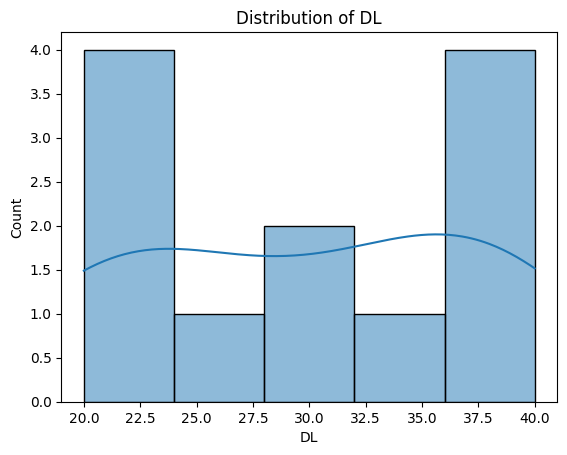

In [ ]:
# Distribution of DL and Consum
sns.histplot(df_grouping['DL'], kde=True)
plt.title("Distribution of DL")
plt.show()

# sns.histplot(df['Consum'], kde=True)
# plt.title("Distribution of Consum")
# plt.show()

## Plotting

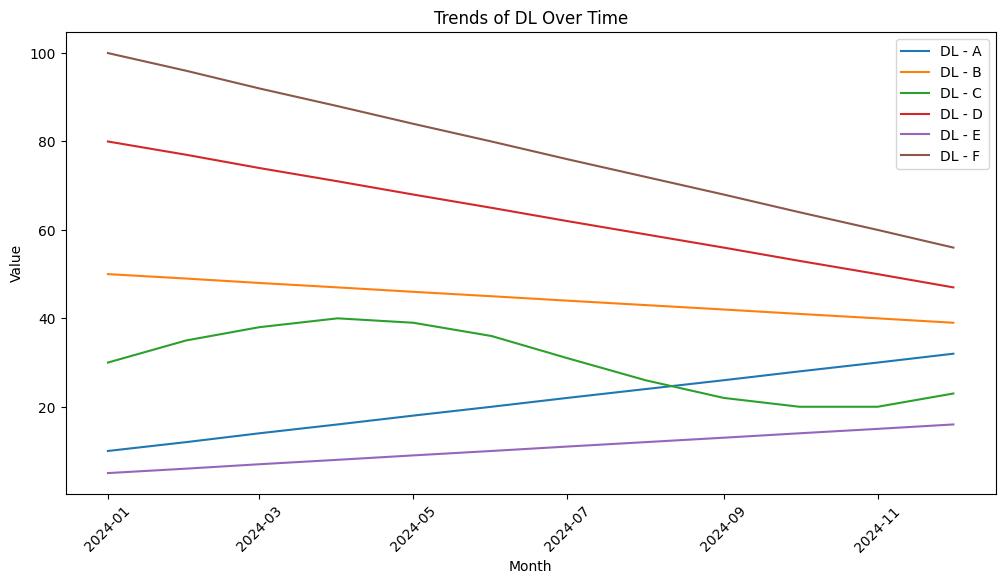

In [73]:
def plot_trends(df, column):
    """
    Generalized function to plot trends of a given column over time for each grouping.

    Parameters:
    df (pd.DataFrame): The dataframe containing the data.
    column (str): The column to plot (e.g., 'DL' or 'Consum').
    """
    plt.figure(figsize=(12, 6))
    
    # Loop through each group and plot the specified column
    for group in df["Grouping"].unique():
        subset = df[df["Grouping"] == group]
        plt.plot(subset["Month"], subset[column], label=f"{column} - {group}")
    
    # Customize the plot
    plt.legend()
    plt.title(f"Trends of {column} Over Time")
    plt.xlabel("Month")
    plt.ylabel("Value")
    plt.xticks(rotation=45)
    plt.show()

# Call the function for DL and Consum
plot_trends(df, 'DL')
# plot_trends(df, "Consum")

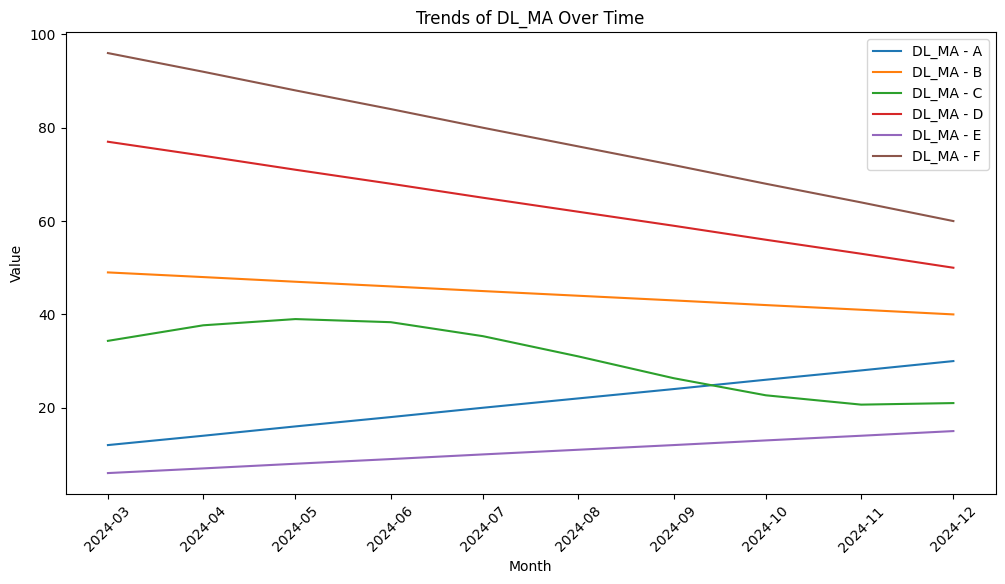

In [74]:
plot_trends(df, feat)

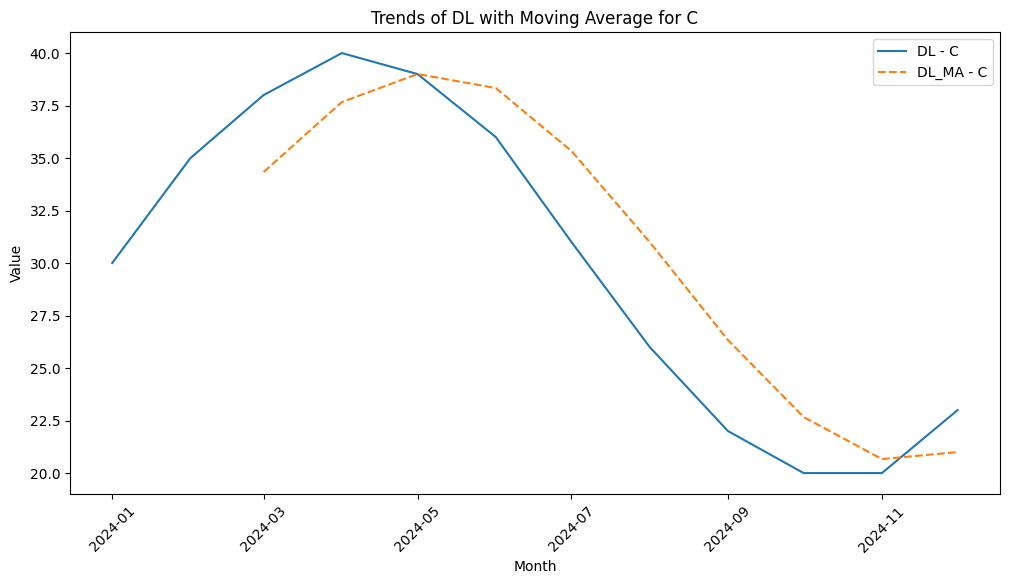

In [83]:
# Plot original and moving average trends for a specific group
def plot_trends_with_ma(df, group, column, ma_column):
    """
    Plot trends for a given group with and without moving average.

    Parameters:
    df (pd.DataFrame): The dataframe containing the data.
    group (str): The grouping to plot.
    column (str): The original column to plot (e.g., 'DL').
    ma_column (str): The moving average column to plot (e.g., 'DL_MA').
    """
    subset = df[df["Grouping"] == group]
    plt.figure(figsize=(12, 6))
    plt.plot(subset["Month"], subset[column], label=f"{column} - {group}")
    plt.plot(subset["Month"], subset[ma_column], label=f"{ma_column} - {group}", linestyle='--')
    
    plt.legend()
    plt.title(f"Trends of {column} with Moving Average for {group}")
    plt.xlabel("Month")
    plt.ylabel("Value")
    plt.xticks(rotation=45)
    plt.show()

# Call the function for Grouping A (you can change this to other groupings)
plot_trends_with_ma(df, 'C', 'DL', 'DL_MA')


## Correlations

In [75]:
# Pivot the dataframe so that each group becomes a column and 'Month' becomes the index
pivoted_df = df.pivot_table(index='Month', columns='Grouping', values=feat)
# pivoted_df.head()

In [76]:
# Compute the correlation matrix across all Groupings (columns)
correlation_matrix_dl = pivoted_df.corr()

# Display the correlation matrix
print(correlation_matrix_dl)

Grouping         A         B         C         D         E         F
Grouping                                                            
A         1.000000 -1.000000 -0.898875 -1.000000  1.000000 -1.000000
B        -1.000000  1.000000  0.898875  1.000000 -1.000000  1.000000
C        -0.898875  0.898875  1.000000  0.898875 -0.898875  0.898875
D        -1.000000  1.000000  0.898875  1.000000 -1.000000  1.000000
E         1.000000 -1.000000 -0.898875 -1.000000  1.000000 -1.000000
F        -1.000000  1.000000  0.898875  1.000000 -1.000000  1.000000


In [77]:
# Get the correlation row for Grouping A
correlation_with_A = correlation_matrix_dl['A']

# Exclude the self-correlation (which will be 1)
correlation_with_A = correlation_with_A.drop('A')

# Sort the correlations in descending order and pick the top
num=2
top_correlated = correlation_with_A.sort_values(ascending=False).head(num)

# Display the top 3 most correlated Groupings for A
print(top_correlated)


Grouping
E    1.000000
C   -0.898875
Name: A, dtype: float64


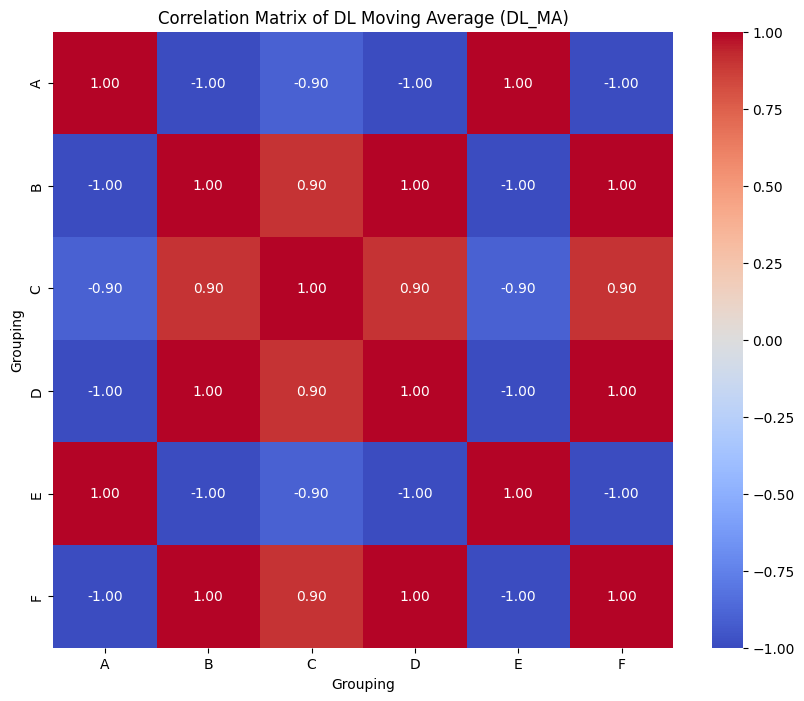

In [81]:
# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_dl, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title("Correlation Matrix of DL Moving Average (DL_MA)")
plt.show()

In [ ]:
## Monthly Update

Every month I update these values, I would like to give a summary and an update for the current month

In [93]:
# Get the most recent month in the dataset
latest_month = df["Month"].max()
latest_data = df[df["Month"] == latest_month]

# Display the latest data for the current month
print(f"Latest month: {latest_month}")
print(latest_data)

# Calculate summary statistics for the latest month
summary_stats = latest_data[["DL", "Consum", "DL_Change", "Consum_Change"]].describe()

# Calculate month-over-month percentage changes for DL and Consum
latest_month_dl_change = latest_data["DL_Change"].values[0]
latest_month_consum_change = latest_data["Consum_Change"].values[0]

# Print the summary statistics
print(f"Summary statistics for the latest month ({latest_month}):")
print(summary_stats)

# Print the rate of change for the current month
print(f"Rate of change for DL: {latest_month_dl_change:.2f}%")
print(f"Rate of change for Consum: {latest_month_consum_change:.2f}%")

# Calculate summary statistics for the latest month
summary_stats = latest_data[["DL", "Consum", "DL_Change", "Consum_Change"]].describe()

# Calculate month-over-month percentage changes for DL and Consum
latest_month_dl_change = latest_data["DL_Change"].values[0]
latest_month_consum_change = latest_data["Consum_Change"].values[0]

# Print the summary statistics
print(f"Summary statistics for the latest month ({latest_month}):")
print(summary_stats)

# Print the rate of change for the current month
print(f"Rate of change for DL: {latest_month_dl_change:.2f}%")
print(f"Rate of change for Consum: {latest_month_consum_change:.2f}%")


Latest month: 2024-12-01 00:00:00
        Month Grouping  DL  Consum  DL_Change  Consum_Change  DL_MA  Consum_MA
66 2024-12-01        A  32      53   6.666667       6.000000   30.0  50.000000
67 2024-12-01        B  39      38  -2.500000      -5.000000   40.0  40.000000
68 2024-12-01        C  23      47  15.000000       9.302326   21.0  42.666667
69 2024-12-01        D  47      68  -6.000000      -2.857143   50.0  70.000000
70 2024-12-01        E  16      37   6.666667       5.714286   15.0  35.000000
71 2024-12-01        F  56      55  -6.666667      -8.333333   60.0  60.000000
Summary statistics for the latest month (2024-12-01 00:00:00):
              DL     Consum  DL_Change  Consum_Change
count   6.000000   6.000000   6.000000       6.000000
mean   35.500000  49.666667   2.194444       0.804356
std    14.923136  11.656186   8.621947       7.126179
min    16.000000  37.000000  -6.666667      -8.333333
25%    25.250000  40.250000  -5.125000      -4.464286
50%    35.500000  50.00000

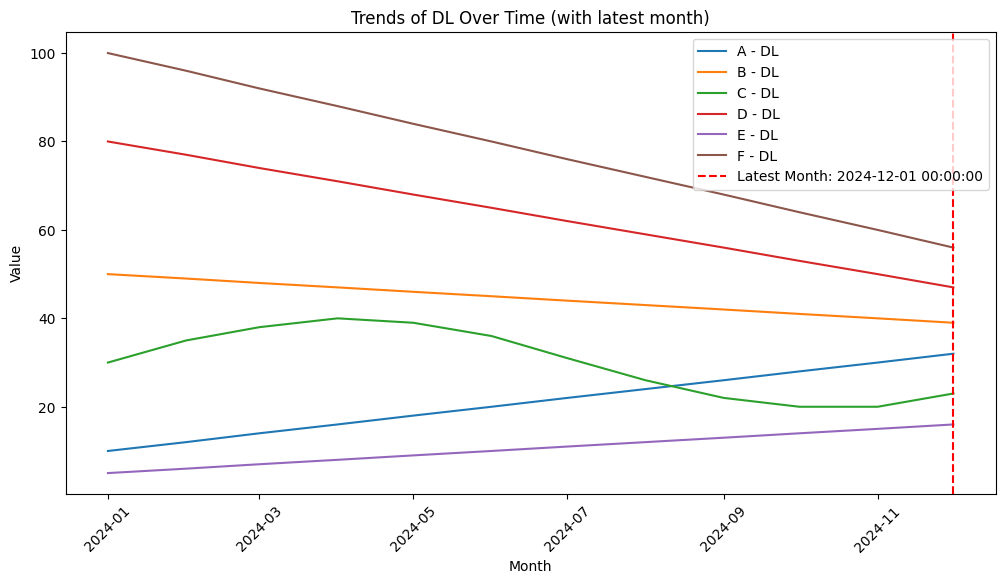

NameError: name 'dl_percentage_change' is not defined

In [94]:


# Plot the trends of DL and Consum for the latest month and previous months
def plot_trends_for_months(df, column):
    """
    Plot the trends of a given column over time, highlighting the latest and previous months.
    """
    plt.figure(figsize=(12, 6))

    # Plot all the data
    for group in df["Grouping"].unique():
        subset = df[df["Grouping"] == group]
        plt.plot(subset["Month"], subset[column], label=f"{group} - {column}")

    # Highlight the most recent month
    plt.axvline(x=latest_month, color='red', linestyle='--', label=f"Latest Month: {latest_month}")
    
    # Customize the plot
    plt.legend()
    plt.title(f"Trends of {column} Over Time (with latest month)")
    plt.xlabel("Month")
    plt.ylabel("Value")
    plt.xticks(rotation=45)
    plt.show()

# Plot trends for DL and Consum
plot_trends_for_months(df, 'DL')
# plot_trends_for_months(df, 'Consum')

def generate_monthly_summary(latest_month, dl_change, consum_change, dl_percentage_change, consum_percentage_change):
    """
    Generate a textual summary for the current month's data.
    """
    summary = (
        f"Monthly Update for {latest_month}:\n"
        f"-----------------------------------\n"
        f"Rate of change for DL: {dl_change:.2f}%\n"
        f"Rate of change for Consum: {consum_change:.2f}%\n"
        f"Comparison to previous month:\n"
        f"  - DL change from previous month: {dl_percentage_change:.2f}%\n"
        f"  - Consum change from previous month: {consum_percentage_change:.2f}%\n"
    )
    return summary

# Generate the summary and print it
monthly_summary = generate_monthly_summary(latest_month, latest_month_dl_change, latest_month_consum_change, dl_percentage_change, consum_percentage_change)
print(monthly_summary)

